In [373]:
# two-shot-classification.py
# The training set will have two coppies of each exaple. I will run single test 
#file against the tarining examples each time. 
import os
import numpy as np
from scipy.ndimage import imread
from scipy.spatial.distance import cdist
from math import*
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline
np.random.seed(1)

In [374]:
nrun = 20  # Number of test files
#path_to_script_dir = os.path.dirname(os.path.realpath("__file__"))
path_to_script_dir='C:/Users/Esta/Projects/two-shots'
path_to_all_runs = os.path.join(path_to_script_dir, 'all_runs')
fname_label = 'class_labels.txt'  # Where class labels are stored for each run

In [375]:
def load_img_as_points(filename):
    # Load image file and return coordinates of black pixels in the binary image
    #
    # Input
    #  filename : string, absolute path to image
    #
   
    I = plt.imread(filename)

    return I


In [376]:

for r in range(0, 3, 2):
    folder1= 'run{:02d}'.format(r+1)
    folder2='run{:02d}'.format(r + 2)
    with open(os.path.join(path_to_all_runs, folder1, fname_label)) as f:
        pairs1 = [line.split() for line in f.readlines()]
        
    with open(os.path.join(path_to_all_runs, folder2, fname_label)) as k:
        pairs2 = [line.split() for line in k.readlines()]
        
    # Unzip the pairs into two sets of tuples
    test_files1, train_files1 = zip(*pairs1)
    test_files2, train_files2 = zip(*pairs2)
    
    
   

    answers_test_files1 = list(test_files1)  # Copy the training file list
    answers_train_files1 = list(train_files1)  # Copy the training file list
    test_files1 = sorted(test_files1)
    train_files1 = sorted(train_files1)

    answers_files2 = list(train_files2)  # Copy the training file list
    test_files2 = sorted(test_files2)
    train_files2 = sorted(train_files2)
 
    
    train_files=train_files1 + train_files2
   
    
train_items = [load_img_as_points(os.path.join(path_to_all_runs, f)) #stored as points images
                   for f in train_files]
test_items1 = [load_img_as_points(os.path.join(path_to_all_runs, f))# stored as points images
                   for f in test_files1]

answer_test_items1 = [load_img_as_points(os.path.join(path_to_all_runs, f))
                   for f in answers_test_files1] #I will use it as a positive examples in L_2
  
answer_train_items1 = [load_img_as_points(os.path.join(path_to_all_runs, f))
                   for f in answers_train_files1] #I will use it as a positive examples in L_2
  


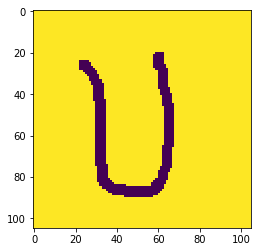

In [377]:

plt.imshow(train_items[0])


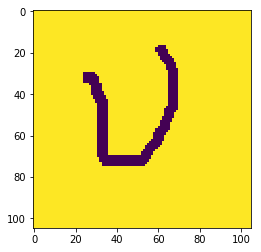

In [378]:
plt.imshow(train_items[20])


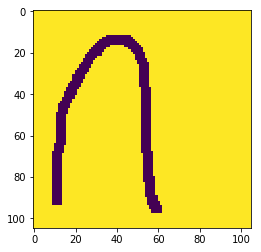

In [379]:
plt.imshow(answer_test_items1[1])

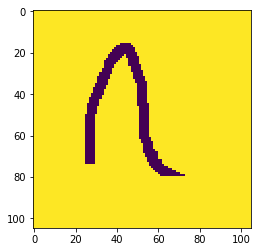

In [380]:
plt.imshow(answer_train_items1[1])

In [381]:
print(answers_test_files1[1])

run03/test/item02.png


In [382]:

# Flatten the training and test images
train_items=np.array(train_items)
test_items1=np.array(test_items1)
# Normalize image vector
X_train = train_items / 255.
X_test = test_items1 / 255.
X_train_new=X_train.reshape(40, 105, 105, 1)
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test1.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_train_new.shape))

conv_layers = {}


number of training examples = 40
number of test examples = 20
X_train shape: (40, 105, 105)
X_test shape: (40, 105, 105, 1)


In [383]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_H0, n_W0, n_c):
   
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_c])
   
    
    return X


In [384]:

X = create_placeholders(105, 105, 1)
print ("X = " + str(X))


X = Tensor("Placeholder_1:0", shape=(?, 105, 105, 1), dtype=float32)


In [385]:

# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                            

    W1 = tf.get_variable("W1", [4, 4, 1, 4], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2, 2, 4, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [386]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1]))
    print("W2 = " + str(parameters["W2"].eval()[1]))
    #print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    #print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W1 = [[[ 0.19431433  0.05261934  0.15128067  0.25907856]]

 [[-0.23965749 -0.09003089 -0.15244845 -0.0983935 ]]

 [[-0.25236657 -0.23703784 -0.09468894 -0.00517666]]

 [[-0.21112946 -0.08546327  0.01218882 -0.10639602]]]
W2 = [[[ 0.00195378  0.21026614 -0.06578097  0.1364184   0.2222499
   -0.0521269  -0.10156429  0.07779878  0.25672495 -0.11070448
   -0.24133678  0.22932369 -0.12131652 -0.19843161  0.00836915
    0.2382459 ]
  [ 0.19370762 -0.00285059 -0.16772057 -0.26896152 -0.08236882
    0.03179002 -0.16993259  0.07838121 -0.13628241 -0.0067054
   -0.01532918 -0.1296589  -0.02574462  0.04416263  0.00078589
    0.01459026]
  [-0.2305329  -0.02772419  0.04661632 -0.07880084  0.24563825
   -0.13493854  0.12062272 -0.21429895  0.1324434  -0.25661463
   -0.00217873 -0.2582657  -0.01833352  0.06193399  0.06280574
    0.04134524]
  [ 0.218218   -0.24522743 -0.1792129   0.08037168 -0.01745364
    0.0291664  -0.16428632  0.07574204  0.12146109 -0.15481046
   -0.04468721  0.17526817 -0.23812

In [387]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    #Z1 = tf.nn.conv2d(x, filter=tf.Variable(tf.truncated_normal([, filter_size, input_channels, output_filters], stddev=0.5)), strides=[1,1,1,1] , padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1 ,1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    # FLATTEN
    P = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 40 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P, 40, activation_fn=None)
 

    return Z3

In [388]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X= create_placeholders(105, 105, 1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    #a = sess.run(Z3, {X: np.random.randn(2,105,105, 1)})
    a = sess.run(Z3, {X: X_train_new})
    print("Z3 = " + str(a))

Z3 = [[ 1.63907767e-04  2.51202122e-03 -1.70492125e-03 ... -7.92267267e-04
   1.13287161e-03  7.21581688e-04]
 [-3.92477668e-05  1.75158167e-03 -7.74777029e-04 ... -1.25867222e-03
   1.03816937e-03  1.99757662e-04]
 [ 2.20093294e-04  1.83201849e-03 -1.64542277e-03 ... -9.99809243e-04
   4.33464127e-04  1.73395179e-04]
 ...
 [ 5.30901190e-04  2.05870881e-03 -1.42856478e-03 ... -9.86182597e-04
   1.37498847e-03 -1.64969533e-04]
 [-8.14328669e-05  1.78922236e-03 -1.43110729e-03 ... -1.25117484e-03
   7.82874471e-04  1.93832704e-04]
 [ 1.22804588e-04  1.99519587e-03 -9.32104187e-04 ... -9.76887532e-04
   6.21022598e-04  1.18417476e-04]]


In [ ]:

def distance(test2, test2):
    # Modified L2_distance
    # Input
    # test= is the test examples
    #negative= images in the training examples
    #positive= this is the result from the one-shot-training 
    # we add a margine to the inequality of the triple loss
    # output : \\f(A)-f(B)\\^2 - \\f(A)-f(C)\\^2 + alpha.
    Dis = cdist(test1, test2)
    Dis_sqr=np.square(Dis)
    Dis_sqr_sum=np.sum(Dis_sqr)
    return Dis_sqr_sum